In [4]:
pip install numpy pandas matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [6]:
np.random.seed(42)
num_samples = 100  # Reduced from 500 to 100

# Generate synthetic formulation data
excipient_ratio = np.random.uniform(0.1, 1.0, num_samples)
compression_force = np.random.uniform(5, 50, num_samples)
granule_size = np.random.uniform(100, 500, num_samples)
binder_percentage = np.random.uniform(1, 10, num_samples)

# Target Variables (Dependent Variables)
dissolution_profile = 10 + 3*excipient_ratio + 1.5*compression_force - 0.01*granule_size + np.random.normal(0, 2, num_samples)
bioavailability = 20 + 4*excipient_ratio - 0.5*compression_force + 0.02*granule_size + np.random.normal(0, 3, num_samples)

# Create DataFrame
df = pd.DataFrame({
    "Excipient Ratio": excipient_ratio,
    "Compression Force": compression_force,
    "Granule Size": granule_size,
    "Binder Percentage": binder_percentage,
    "Dissolution Profile": dissolution_profile,
    "Bioavailability": bioavailability
})

# Display first few rows
print(df.head())


   Excipient Ratio  Compression Force  Granule Size  Binder Percentage  \
0         0.437086           6.414313    356.812658           1.465135   
1         0.955643          33.638469    133.655986           5.782192   
2         0.758795          19.146019    164.651486           5.865716   
3         0.638793          27.885681    459.421675           6.736869   
4         0.240417          45.840491    342.571624           7.534822   

   Dissolution Profile  Bioavailability  
0            19.975559        26.674383  
1            62.030079         7.430997  
2            40.712803        21.408654  
3            48.530149        18.147787  
4            76.704604         8.430745  


In [7]:
X = df[["Excipient Ratio", "Compression Force", "Granule Size", "Binder Percentage"]]
y_dissolution = df["Dissolution Profile"]
y_bioavailability = df["Bioavailability"]

# Split the data
X_train, X_test, y_train_dissolution, y_test_dissolution = train_test_split(X, y_dissolution, test_size=0.2, random_state=42)
X_train, X_test, y_train_bioavailability, y_test_bioavailability = train_test_split(X, y_bioavailability, test_size=0.2, random_state=42)


In [8]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)  # Reduced estimators
rf_model.fit(X_train, y_train_dissolution)
rf_pred = rf_model.predict(X_test)

print("Random Forest Model trained successfully for Dissolution Profile Prediction")


Random Forest Model trained successfully for Dissolution Profile Prediction


In [9]:
xgb_model = XGBRegressor(n_estimators=5, random_state=42)  # Reduced estimators
xgb_model.fit(X_train, y_train_bioavailability)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Model trained successfully for Bioavailability Prediction")


XGBoost Model trained successfully for Bioavailability Prediction


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

print("PCA Analysis Completed")


PCA Analysis Completed


In [11]:
stability_time = np.random.uniform(30, 365, num_samples)
degradation_rate = np.exp(-0.01 * stability_time) + np.random.normal(0, 0.02, num_samples)

X_stability = stability_time.reshape(-1, 1)
y_stability = degradation_rate

reg_model = LinearRegression()
reg_model.fit(X_stability, y_stability)
stability_pred = reg_model.predict(X_stability)

print("Regression Model trained for Drug Stability Analysis")


Regression Model trained for Drug Stability Analysis


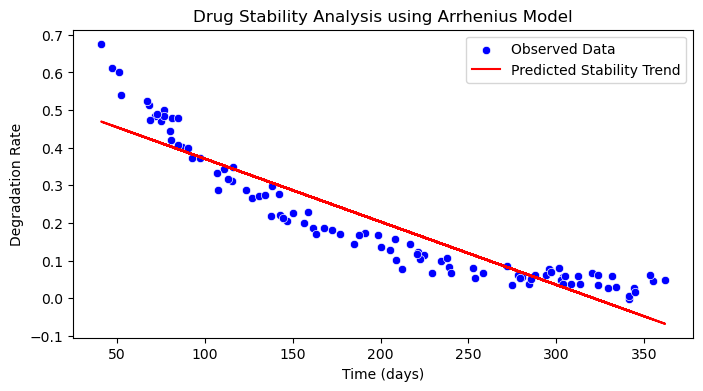

In [12]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=stability_time, y=degradation_rate, label="Observed Data", color="blue")
plt.plot(stability_time, stability_pred, color="red", label="Predicted Stability Trend")
plt.xlabel("Time (days)")
plt.ylabel("Degradation Rate")
plt.title("Drug Stability Analysis using Arrhenius Model")
plt.legend()
plt.show()


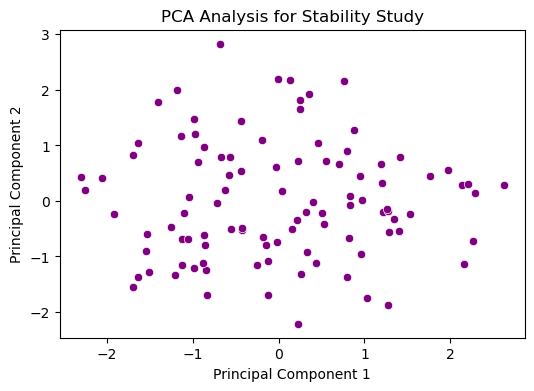

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], color="purple")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Analysis for Stability Study")
plt.show()
